In [12]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F

In [10]:
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [85]:
batch_size = 50
num_epochs = 50

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [86]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_l1_dim, hidden_l2_dim, output_dim, activation_func):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_l1_dim) 
        self.fc2 = nn.Linear(hidden_l1_dim, hidden_l2_dim)
        self.fc3 = nn.Linear(hidden_l2_dim, output_dim)

    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        return self.fc3(x)

In [87]:
model = FNN(input_dim=784, hidden_l1_dim=20, hidden_l2_dim=15, output_dim=10, activation_func=F.sigmoid)

In [88]:
loss_criterion = nn.CrossEntropyLoss()

In [89]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.1)

In [90]:
def test_model(model):
    total_loss = 0
    for i, (images, y_test) in enumerate(test_loader):
        images = images.view(-1, 28*28).requires_grad_()
        y_pred = model(images)
        loss = loss_criterion(y_pred, y_test)
        total_loss += loss.item()
    return total_loss/(i+1)


In [91]:
train_losses = []
test_losses = []
for epoch in range(num_epochs):
    total_loss = 0
    for i, (images, y_test) in enumerate(train_loader):
        images = images.view(-1, 28*28).requires_grad_()
        optimizer.zero_grad()
        y_pred = model(images)
        loss = loss_criterion(y_pred, y_test)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    train_losses.append(total_loss/(i+1))
    test_losses.append(test_model(model))

In [92]:
import matplotlib.pyplot as plt

def plot_list(arr: list, title: str, x_label: str, y_label: str):
    plt.plot([i+1 for i in range(len(arr))], arr, label=title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

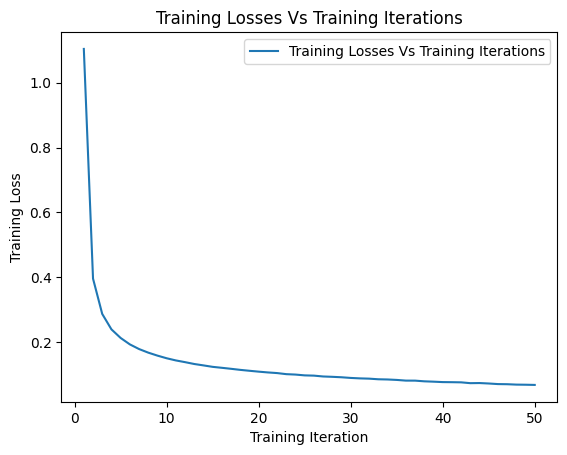

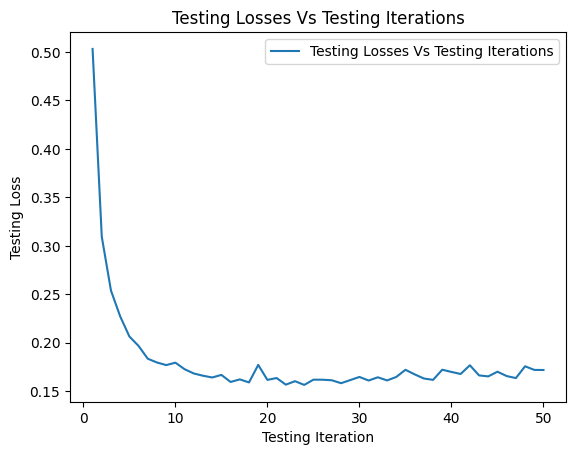

In [93]:
#Plotting Training and Testing Losses

plot_list(train_losses, "Training Losses Vs Training Iterations", "Training Iteration", "Training Loss")
plot_list(test_losses, "Testing Losses Vs Testing Iterations", "Testing Iteration", "Testing Loss")